In [14]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

In [15]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


FIRST: I will divide my dataframe into two namely the INDEPENDENT variable and 
the TARGET varible. My independent variable = inputs: Pclass,sex,age,fare. 
So i will drop others.My target variable = Survived

In [16]:
inputs = data.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
target = data['Survived']

In [17]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [18]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

BUT BECAUSE I CAN WORK WITH STRINGS

In [19]:
inputs.Sex = inputs.Sex.map({'male':1,'female':2})

In [20]:
inputs.Sex

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

CHECKING FOR NAN VALUES

In [21]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [25]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [30]:
inputs.Age.round(1)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

To split my dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state = 0)

CONFIRM SPLITTING

In [32]:
len(X_test)

179

In [33]:
len(X_train)

712

SCALING THE DATA FOR BETTER PERFORMANCE

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[ 0.81925059,  1.37207547, -0.00282437, -0.33167904],
       [-0.38096838, -0.72882288,  0.09662937, -0.42640542],
       [-0.38096838, -0.72882288,  0.09662937,  0.10261958],
       ...,
       [ 0.81925059, -0.72882288, -0.00282437, -0.48162887],
       [ 0.81925059,  1.37207547,  0.47888431, -0.28868112],
       [-0.38096838, -0.72882288,  2.31370804,  0.14245584]])

In [36]:
X_test

array([[ 8.19250590e-01, -7.28822884e-01, -2.82437263e-03,
        -3.47397578e-01],
       [ 8.19250590e-01, -7.28822884e-01, -2.82437263e-03,
        -4.85287550e-01],
       [ 8.19250590e-01, -7.28822884e-01, -1.73819436e+00,
        -5.46495998e-02],
       [-1.58118735e+00,  1.37207547e+00, -2.82437263e-03,
         2.28857574e+00],
       [ 8.19250590e-01,  1.37207547e+00, -5.62726079e-02,
        -3.31679043e-01],
       [-1.58118735e+00, -7.28822884e-01, -2.82437263e-03,
        -2.72045392e-02],
       [-1.58118735e+00,  1.37207547e+00,  7.84688267e-01,
         2.42713238e+00],
       [-1.58118735e+00,  1.37207547e+00,  9.66293694e-02,
         2.65476071e+00],
       [-1.58118735e+00, -7.28822884e-01, -3.62076563e-01,
         1.18195896e+00],
       [ 8.19250590e-01,  1.37207547e+00, -2.82437263e-03,
        -4.91690733e-01],
       [ 8.19250590e-01, -7.28822884e-01, -2.85625574e-01,
        -4.79215705e-01],
       [-3.80968381e-01,  1.37207547e+00,  7.84688267e-01,
      

### USING DIFFERENT MACHINE LEARNING ALGORITHM TO KNOW WHICH PREDICT MOST ACURATELY

First with Logistic Regression algorithm

In [37]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[93 17]
 [18 51]]


Accuracy of Logistic Regression: 80.44692737430168 

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

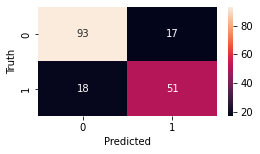

In [38]:
plt.figure(figsize=(4,2))
sns.heatmap(lr_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Secondly with Naive Bayes algorithm

In [39]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[87 23]
 [16 53]]


Accuracy of Naive Bayes model: 78.2122905027933 

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

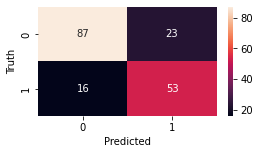

In [40]:
plt.figure(figsize=(4,2))
sns.heatmap(nb_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Third algorithm is the Random Forest Classfier

In [41]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[105   5]
 [ 26  43]]


Accuracy of Random Forest: 82.68156424581005 

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       110
           1       0.90      0.62      0.74        69

    accuracy                           0.83       179
   macro avg       0.85      0.79      0.80       179
weighted avg       0.84      0.83      0.82       179



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

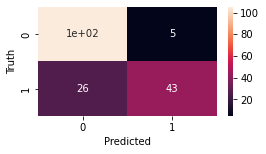

In [44]:
plt.figure(figsize=(4,2))
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With K-NeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[97 13]
 [27 42]]


Accuracy of K-NeighborsClassifier: 77.6536312849162 

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179



Text(15.0, 0.5, 'Truth')

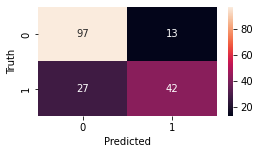

In [48]:
plt.figure(figsize=(4,2))
sns.heatmap(knn_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[98 12]
 [20 49]]


Accuracy of DecisionTreeClassifier: 82.12290502793296 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

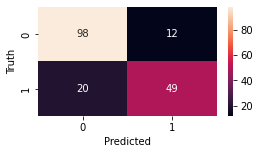

In [51]:
plt.figure(figsize=(4,2))
sns.heatmap(dt_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

With Support Vector Classifier

In [52]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[96 14]
 [20 49]]


Accuracy of Support Vector Classifier: 81.00558659217877 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



WITH HEATMAP BETTER VISUALIZATION

Text(15.0, 0.5, 'Truth')

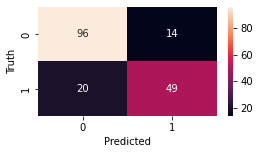

In [53]:
plt.figure(figsize=(4,2))
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

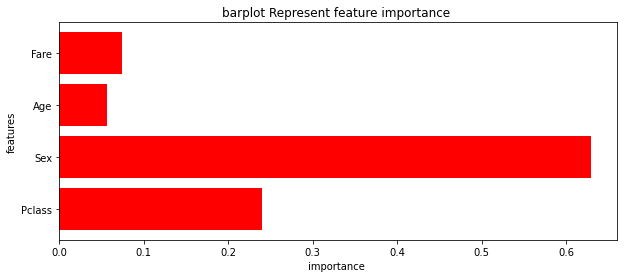

In [55]:
imp_feature = pd.DataFrame({'Feature': ['Pclass','Sex','Age','Fare'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'red')
plt.show()